In [1]:
#using the following links as guides
#Intro to CNN Keras -- https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
#Deep NNN Keras Way -- https://www.kaggle.com/poonaml/deep-neural-network-keras-way
#Keras CNN -- https://anaconda.org/ericmanley/cs167_keras_dogcat/notebook

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, Lambda, BatchNormalization, Convolution2D , MaxPooling2D, Conv2D
from keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing import image

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
NUMBER_TRAIN_EXAMPLES = 20000
NUMBER_VALIDATION_EXAMPLES = 4000
BATCH_SIZE = 32
NUMBER_EPOCHS = 12 #the longest time to run an epoch was about 150s 30min/150s = about 12 epochs in 30 mins
IMAGE_HEIGHT = 28
IMAGE_WIDTH = 28

In [3]:
def standardize(x): 
    return (x-mean_px)/std_px

In [27]:
def show_acc_graph(training_results, model_name):
    #using the results returned by the training history to visualize
    #accuracy on the training and testing sets for each epoch
    plt.plot(training_results.history['acc'])
    plt.plot(training_results.history['val_acc'])
    plt.title(model_name + ' accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [5]:
train = pd.read_csv('digits/digittrain.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test = pd.read_csv('digits/digittest.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [8]:
y_train
#the output variable is an integer from 0 to 9.  It is a multiclass classification problem

array([1, 0, 1, ..., 7, 6, 9])

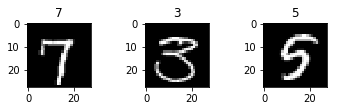

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [10]:
#expand 1 more dimension as 1 for colour channel gray
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_train.shape

(42000, 28, 28, 1)

In [11]:
#x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
#x_test.shape

In [12]:
#for standardization
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

In [13]:
#One hot encoding of labels
#A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. 
#In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.
#For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

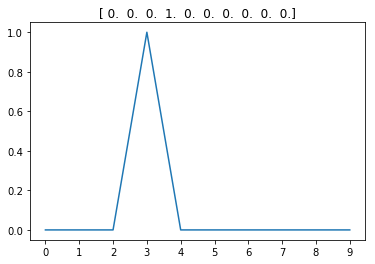

In [14]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [15]:
gen = image.ImageDataGenerator()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)
batches = gen.flow(x_train, y_train, batch_size=BATCH_SIZE)
val_batches=gen.flow(x_val, y_val, batch_size=BATCH_SIZE)

# First Model

In [16]:
#We'll try another model, this time with pooling layers after each
#convolutional layer, and then a dropout layer before the final node to see if we can avoid over-fitting
#changing the kernal size from 3 to 1

#setting up a sequential model
original_model = Sequential()

#adding two conv2d layers each with 32 filters and a kernel size of 5x5
original_model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
original_model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
##this layer looks at the 2 neighboring pixels and picks the max value and it helps reduce overfitting
original_model.add(MaxPooling2D(pool_size=(2, 2)))
#a proportion of nodes in the layer are randomly ignored
#This randomly drops a propotion of the network and forces the network to learn features in a distributed way
#also reduces overfitting
original_model.add(Dropout(0.50))

#adding two more conv2d layers each with 64 filters and a kernel size of 5x5
original_model.add(Conv2D(64, (5, 5),activation = 'relu'))
original_model.add(Conv2D(64, (5, 5),activation = 'relu'))
##this layer looks at the 2 neighboring pixels and picks the max value and it helps reduce overfitting
original_model.add(MaxPooling2D(pool_size=(2, 2)))
#a proportion of nodes in the layer are randomly ignored
#This randomly drops a propotion of the network and forces the network to learn features in a distributed way
#also reduces overfitting
original_model.add(Dropout(0.50))

original_model.add(Flatten())
original_model.add(Dense(64,activation = 'relu'))
original_model.add(Dropout(0.5))
original_model.add(Dense(10,activation='sigmoid'))

print("input shape ",original_model.input_shape)
print("output shape ",original_model.output_shape)

original_model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [17]:
training_results_orig = original_model.fit_generator(
    batches, 
    steps_per_epoch = NUMBER_TRAIN_EXAMPLES // BATCH_SIZE, 
    epochs=NUMBER_EPOCHS,      
    validation_data=val_batches, 
    validation_steps = NUMBER_VALIDATION_EXAMPLES // BATCH_SIZE
)

Epoch 1/12
625/625 [==============================] - 111s - loss: 2.4684 - acc: 0.4362 - val_loss: 0.3047 - val_acc: 0.9317
Epoch 2/12
625/625 [==============================] - 111s - loss: 0.5198 - acc: 0.8534 - val_loss: 0.1354 - val_acc: 0.9663
Epoch 3/12
625/625 [==============================] - 118s - loss: 0.3763 - acc: 0.9070 - val_loss: 0.1420 - val_acc: 0.9675
Epoch 4/12
625/625 [==============================] - 118s - loss: 0.3545 - acc: 0.9188 - val_loss: 0.1353 - val_acc: 0.9731
Epoch 5/12
625/625 [==============================] - 122s - loss: 0.4159 - acc: 0.9138 - val_loss: 0.1326 - val_acc: 0.9765
Epoch 6/12
625/625 [==============================] - 117s - loss: nan - acc: 0.6149 - val_loss: nan - val_acc: 0.0929
Epoch 7/12
625/625 [==============================] - 118s - loss: nan - acc: 0.1009 - val_loss: nan - val_acc: 0.0965
Epoch 8/12
625/625 [==============================] - 121s - loss: nan - acc: 0.0983 - val_loss: nan - val_acc: 0.1034
Epoch 9/12
625/625

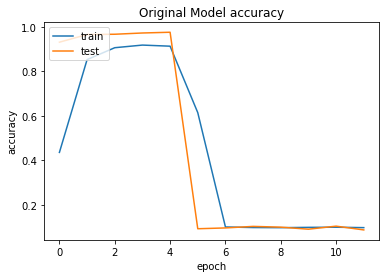

In [28]:
show_acc_graph(training_results_orig, 'Original Model')

# Second Model -- Modified Version of original_model

In [18]:
#using the same model as above but with a different kernel size
#changing the kernal size from 5 to 3

#setting up a sequential model
modified_original_model = Sequential()

#adding two conv2d layers each with 32 filters and a kernel size of 5x5
modified_original_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
modified_original_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
##this layer looks at the 2 neighboring pixels and picks the max value and it helps reduce overfitting
modified_original_model.add(MaxPooling2D(pool_size=(2, 2)))
#a proportion of nodes in the layer are randomly ignored
#This randomly drops a propotion of the network and forces the network to learn features in a distributed way
#also reduces overfitting
modified_original_model.add(Dropout(0.50))

#adding two more conv2d layers each with 64 filters and a kernel size of 5x5
modified_original_model.add(Conv2D(64, (3, 3),activation = 'relu'))
modified_original_model.add(Conv2D(64, (3, 3),activation = 'relu'))
##this layer looks at the 2 neighboring pixels and picks the max value and it helps reduce overfitting
modified_original_model.add(MaxPooling2D(pool_size=(2, 2)))
#a proportion of nodes in the layer are randomly ignored
#This randomly drops a propotion of the network and forces the network to learn features in a distributed way
#also reduces overfitting
modified_original_model.add(Dropout(0.50))

modified_original_model.add(Flatten())
modified_original_model.add(Dense(64,activation = 'relu'))
modified_original_model.add(Dropout(0.5))
modified_original_model.add(Dense(10,activation='sigmoid'))

print("input shape ",modified_original_model.input_shape)
print("output shape ",modified_original_model.output_shape)

modified_original_model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [19]:
training_results_mod_orig = modified_original_model.fit_generator(
    batches, 
    steps_per_epoch = NUMBER_TRAIN_EXAMPLES // BATCH_SIZE, 
    epochs=NUMBER_EPOCHS,      
    validation_data=val_batches, 
    validation_steps = NUMBER_VALIDATION_EXAMPLES // BATCH_SIZE
)

Epoch 1/12
625/625 [==============================] - 92s - loss: 1.6870 - acc: 0.4768 - val_loss: 0.2311 - val_acc: 0.9447
Epoch 2/12
625/625 [==============================] - 95s - loss: 0.4321 - acc: 0.8773 - val_loss: 0.1120 - val_acc: 0.9676
Epoch 3/12
625/625 [==============================] - 95s - loss: 0.2950 - acc: 0.9210 - val_loss: 0.0995 - val_acc: 0.9722
Epoch 4/12
625/625 [==============================] - 88s - loss: 0.2576 - acc: 0.9299 - val_loss: 0.0864 - val_acc: 0.9757
Epoch 5/12
625/625 [==============================] - 89s - loss: 0.2278 - acc: 0.9394 - val_loss: 0.1037 - val_acc: 0.9720
Epoch 6/12
625/625 [==============================] - 92s - loss: 0.2013 - acc: 0.9470 - val_loss: 0.0806 - val_acc: 0.9744
Epoch 7/12
625/625 [==============================] - 90s - loss: 0.2042 - acc: 0.9486 - val_loss: 0.1142 - val_acc: 0.9768
Epoch 8/12
625/625 [==============================] - 90s - loss: 0.2064 - acc: 0.9470 - val_loss: 0.0824 - val_acc: 0.9817
Epoch 9/

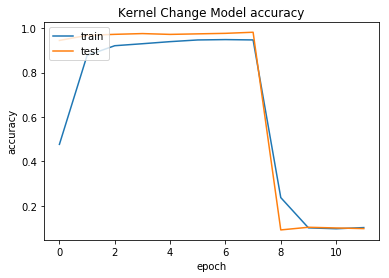

In [30]:
show_acc_graph(training_results_mod_orig, 'Kernel Change Model')

In [22]:
#We'll try another model, this time with pooling layers after each
#convolutional layer, and then a dropout layer before the final node to see if we can avoid over-fitting
#changing the kernal size from 3 to 1

#adding a layer we didnt explore in class
from keras.layers.normalization import BatchNormalization as bn

new_layer_model = Sequential()

new_layer_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
new_layer_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
new_layer_model.add(bn())
new_layer_model.add(MaxPooling2D(pool_size=(2, 2)))
new_layer_model.add(bn())
new_layer_model.add(Dropout(0.5))

new_layer_model.add(Conv2D(64, (3, 3),activation = 'relu'))
new_layer_model.add(Conv2D(64, (3, 3),activation = 'relu'))
new_layer_model.add(bn())
new_layer_model.add(MaxPooling2D(pool_size=(2, 2)))
new_layer_model.add(bn())
new_layer_model.add(Dropout(0.5))

new_layer_model.add(Flatten())
new_layer_model.add(Dense(64,activation = 'relu'))
new_layer_model.add(Dropout(0.5))
new_layer_model.add(Dense(10,activation='sigmoid'))

print("input shape ",new_layer_model.input_shape)
print("output shape ",new_layer_model.output_shape)

new_layer_model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [23]:
training_results_new_layer = new_layer_model.fit_generator(
    batches, 
    steps_per_epoch = NUMBER_TRAIN_EXAMPLES // BATCH_SIZE, 
    epochs=NUMBER_EPOCHS,      
    validation_data=val_batches, 
    validation_steps = NUMBER_VALIDATION_EXAMPLES // BATCH_SIZE
)

Epoch 1/12
625/625 [==============================] - 142s - loss: 0.6880 - acc: 0.8024 - val_loss: 0.1279 - val_acc: 0.9647
Epoch 2/12
625/625 [==============================] - 138s - loss: 0.2472 - acc: 0.9348 - val_loss: 0.0840 - val_acc: 0.9804
Epoch 3/12
625/625 [==============================] - 141s - loss: 0.1803 - acc: 0.9523 - val_loss: 0.0878 - val_acc: 0.9805
Epoch 4/12
625/625 [==============================] - 136s - loss: 0.1617 - acc: 0.9578 - val_loss: 0.0712 - val_acc: 0.9809
Epoch 5/12
625/625 [==============================] - 136s - loss: 0.1583 - acc: 0.9587 - val_loss: 0.0694 - val_acc: 0.9848
Epoch 6/12
625/625 [==============================] - 138s - loss: 0.1359 - acc: 0.9647 - val_loss: 0.0599 - val_acc: 0.9842
Epoch 7/12
625/625 [==============================] - 135s - loss: 0.1322 - acc: 0.9668 - val_loss: 0.0454 - val_acc: 0.9882
Epoch 8/12
625/625 [==============================] - 129s - loss: 0.1297 - acc: 0.9687 - val_loss: 0.0723 - val_acc: 0.9832


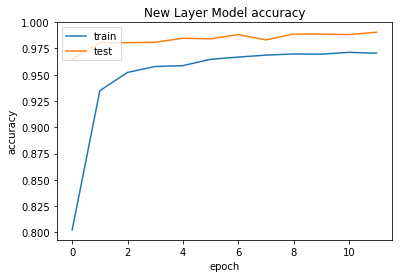

In [31]:
show_acc_graph(training_results_new_layer, 'New Layer Model')